# Task 3: Customer Segmentation / Clustering
## Perform customer segmentation using clustering techniques. Use both profile information (from Customers.csv) and transaction information (from Transactions.csv).
### ● You have the flexibility to choose any clustering algorithm and any number of clusters in between(2 and 10)
### ● Calculate clustering metrics, including the DB Index(Evaluation will be done on this).
### ● Visualise your clusters using relevant plots.


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder

In [21]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [23]:
# Prepare data for clustering
customer_features = df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': 'first'  # Use the first region for each customer
}).reset_index()

In [24]:
# One-hot encode the 'Region' column
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(customer_features[['Region']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Region']))

In [25]:
# Drop the original 'Region' column and concatenate the encoded features
clustering_data = customer_features.drop(columns=['CustomerID', 'Region'])
clustering_data = pd.concat([clustering_data, encoded_df], axis=1)

In [26]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

In [27]:
# Add cluster labels to customer features
customer_features['Cluster'] = clusters

In [28]:
# Calculate DB Index
db_index = davies_bouldin_score(clustering_data, clusters)
print(f'DB Index: {db_index}')

DB Index: 0.5253804757869114


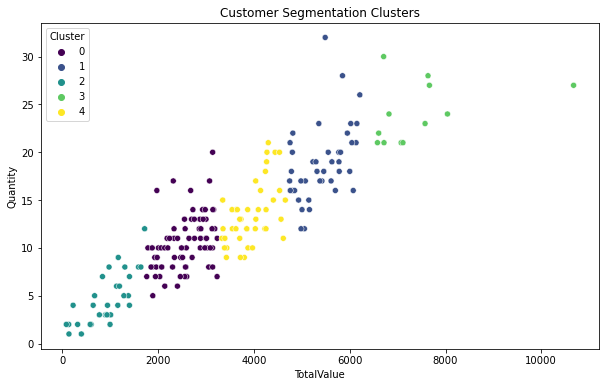

In [29]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_features, palette='viridis')
plt.title('Customer Segmentation Clusters')
plt.show()